In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import struct

N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr

In [52]:
df = pd.read_csv("Data/координаты_дорог_ВАП.txt", sep="\t", names=['index', 'i', 'j', 'id_road'])

In [5]:
df.head()

,index,i,j,id_road
0,1,676,198,1
1,2,675,198,1
2,3,675,199,1
3,4,674,199,1
4,5,674,200,1


In [53]:
number_road = np.sort(df['id_road'].unique())
# длина дороги
road_len = [df[df['id_road'] == i]['id_road'].count() for i in number_road]
# координаты дороги
i_coordinate_road = pd.Series([i for i in df[df['id_road']==k]['i']] for k in number_road)
j_coordinate_road = pd.Series([j for j in df[df['id_road']==k]['j']] for k in number_road)

In [54]:
d = {'id_road' : number_road, 'i_coordinate' : i_coordinate_road, 'j_coordinate' : j_coordinate_road, 'len_road' : road_len}
ds = pd.DataFrame(d)

In [8]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33


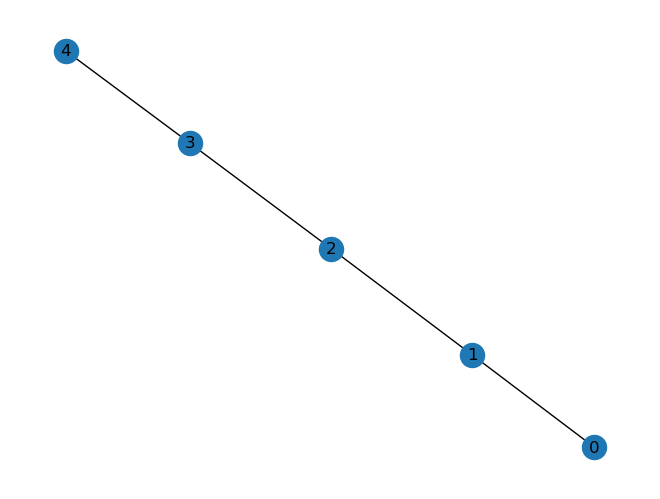

In [15]:
G = nx.path_graph(5)
nx.draw(G, with_labels=True)

In [107]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,len_neighbours,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[109, 8, 236]","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[44, 1]","[3, 16]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[0, 77, 0]","[33, 34, 73]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[43, 57]","[5, 35]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[32, 29]","[6, 20]"


In [128]:
a = [(i, j, k) for i in ds['id_road'].values \
    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
b = [(j, i, k) for i in ds['id_road'].values \
    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
c = a + b

In [141]:
c[24:]

[(53, 74, 38),
 (55, 76, 88),
 (56, 76, 1),
 (57, 74, 34),
 (57, 76, 78),
 (58, 62, 0),
 (61, 63, 13),
 (66, 67, 112),
 (70, 71, 84),
 (72, 84, 17),
 (73, 95, 24),
 (2, 1, 109),
 (15, 1, 8),
 (32, 1, 236),
 (3, 2, 44),
 (16, 2, 1),
 (33, 3, 0),
 (34, 3, 77),
 (73, 3, 0),
 (5, 4, 43),
 (35, 4, 57),
 (6, 5, 32),
 (20, 5, 29),
 (23, 7, 35),
 (43, 9, 53),
 (31, 12, 99),
 (64, 22, 235),
 (25, 24, 132),
 (33, 32, 132),
 (48, 32, 123),
 (73, 33, 0),
 (41, 40, 34),
 (52, 51, 54),
 (53, 51, 153),
 (74, 52, 132),
 (74, 53, 38),
 (76, 55, 88),
 (76, 56, 1),
 (74, 57, 34),
 (76, 57, 78),
 (62, 58, 0),
 (63, 61, 13),
 (67, 66, 112),
 (71, 70, 84),
 (84, 72, 17),
 (95, 73, 24)]

In [185]:
G = nx.DiGraph()
a = [(i, j, k) for i in ds['id_road'].values \
    for j, k in zip(ds[ds['id_road'] == i]['neighbours'].values[0], \
        ds[ds['id_road'] == i]['len_neighbours'].values[0])]
G.add_weighted_edges_from(a)

In [164]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,len_neighbours,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[109, 8, 236]","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[44, 1]","[3, 16]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[0, 77, 0]","[33, 34, 73]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[43, 57]","[5, 35]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[32, 29]","[6, 20]"


In [191]:
ds[ds['id_road'] == 16]['neighbours']

14    [2]
Name: neighbours, dtype: object

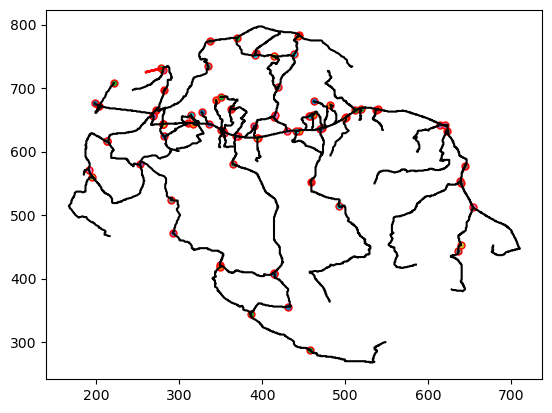

In [190]:
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
j = int(input("Введите от какой дороги считать расстояние"))
try:
    shortest_path_s_v = nx.reconstruct_path(1, j, predecessors)
    for j in ds['id_road']:
        plt.plot(np.array(ds[ds['id_road'] == j]['j_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), np.array(ds[ds['id_road'] == j]['i_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), color='000')
        plt.scatter(ds[ds['id_road'] == j]['j_coordinate'].values[0][0], ds[ds['id_road'] == j]['i_coordinate'].values[0][0], s=25, edgecolors='red')
    for i in shortest_path_s_v:
        plt.plot(np.array(ds[ds['id_road'] == j]['j_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), np.array(ds[ds['id_road'] == j]['i_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), color='red')
except:
    print("Нет пути")

In [188]:
ds[ds['id_road']==12]['neighbours']

11    [31]
Name: neighbours, dtype: object

In [187]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,len_neighbours,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[109, 8, 236]","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[109, 44, 1]","[1, 3, 16]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[44, 0, 77, 0]","[2, 33, 34, 73]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[43, 57]","[5, 35]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[43, 32, 29]","[4, 6, 20]"


In [149]:
shortest_path_s_v

[34, 3, 2, 1]

In [112]:
ds[ds['id_road'] == 1]['neighbours'].values[0]

[2, 15, 32]

Text(0.5, 1.0, 'Shortest path between [s] and [v]: s -> x -> u -> v')

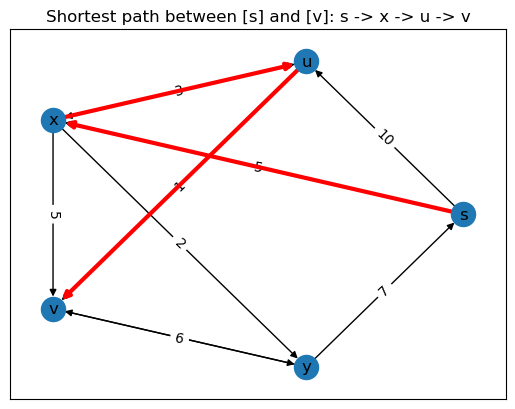

In [16]:
G = nx.DiGraph()
G.add_weighted_edges_from([
    ('s', 'u', 10), ('s', 'x', 5), ('u', 'v', 1), ('u', 'x', 2), 
    ('v', 'y', 1), ('x', 'u', 3), ('x', 'v', 5), ('x', 'y', 2), 
    ('y', 's', 7), ('y', 'v', 6)])
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
shortest_path_s_v = nx.reconstruct_path('s', 'v', predecessors)
edges = [(a,b) for a,b in zip(shortest_path_s_v, shortest_path_s_v[1:])]
weights = nx.get_edge_attributes(G, 'weight')
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3)
title = "Shortest path between [{}] and [{}]: {}"\
        .format("s", "v", " -> ".join(shortest_path_s_v))
plt.title(title)

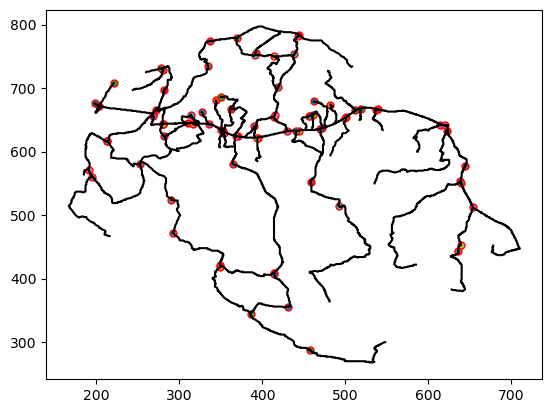

In [20]:
for j in ds['id_road']:
     plt.plot(np.array(ds[ds['id_road'] == j]['j_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), np.array(ds[ds['id_road'] == j]['i_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), color='000')
     plt.scatter(ds[ds['id_road'] == j]['j_coordinate'].values[0][0], ds[ds['id_road'] == j]['i_coordinate'].values[0][0], s=25, edgecolors='red')

In [15]:
ds[ds['id_road'] == 1]['j_coordinate'].values[0][-1]

268

In [55]:
ds['x'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][0] for j in ds['id_road'].unique()]
ds['y'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][0] for j in ds['id_road'].unique()]

In [56]:
ds['x_last'] = [ds[ds['id_road'] == j]['j_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['y_last'] = [ds[ds['id_road'] == j]['i_coordinate'].values[0][-1] for j in ds['id_road'].unique()]
ds['xy_last'] = [(int(ds[ds['id_road'] == j]['x_last']), int(ds[ds['id_road'] == j]['y_last'])) \
    for j in ds['id_road'].unique()]

In [17]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)"


In [57]:
ds['xy'] = [(int(ds[ds['id_road'] == j]['x']), int(ds[ds['id_road'] == j]['y'])) \
    for j in ds['id_road'].unique()]

In [12]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)"


In [58]:
# координаты дороги
coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
    for k in number_road)
ds['coordinate'] = coordinate_road

In [115]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last,coordinate
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)","[(676, 198), (675, 198), (675, 199), (674, 199..."
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)","[(657, 268), (656, 268), (656, 269), (655, 269..."
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)","[(644, 280), (644, 279), (644, 280), (644, 281..."
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)","[(645, 310), (645, 310), (645, 311), (645, 311..."
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)","[(643, 336), (643, 337), (643, 337), (643, 338..."


In [183]:
# Поиск соседей
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values:
        if(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)


In [184]:
# Расстояния между соседями
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        dist1 = np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]]))[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        dist2 = np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==i]['i_coordinate'].values[0]) == i_).ravel(), \
            np.argwhere(np.array(ds[ds['id_road']==i]['j_coordinate'].values[0]) == j_).ravel())[0]
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)


In [97]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,len_neighbours,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[109, 8, 236]","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[44, 1]","[3, 16]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[0, 77, 0]","[33, 34, 73]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[43, 57]","[5, 35]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[32, 29]","[6, 20]"


In [86]:
np.argwhere(np.in1d([str(item) for item in ds[ds['id_road']==3]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==34]['coordinate'].values[0]]))[0][0]

31

In [27]:
ds['len_neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    for i in ds[ds['id_road']==j]['neighbours'].values[0]:
        # Расстояние между узлами дорог
        a = np.in1d(ds[ds['id_road']==j]['i_coordinate'].values[0], ds[ds['id_road']==i]['i_coordinate'].values[0])
        b = np.in1d(ds[ds['id_road']==j]['j_coordinate'].values[0], ds[ds['id_road']==i]['j_coordinate'].values[0])
        dist1 = np.argwhere(np.logical_and(a, b) == True)[0][0]
        j_ = ds[ds['id_road']==j]['j_coordinate'].values[0][dist1]
        i_ = ds[ds['id_road']==j]['i_coordinate'].values[0][dist1]
        dist2 = np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==i]['i_coordinate'].values[0]) == i_).ravel(), \
            np.argwhere(np.array(ds[ds['id_road']==i]['j_coordinate'].values[0]) == j_).ravel())[0]
        ds[ds['id_road']==j]['len_neighbours'].values[0].append(dist1 + dist2)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [28]:
ds

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours,len_neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 15, 32]","[109, 8, 236]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16]","[44, 1]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73]",[0]
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 35]",[]
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,84,"[453, 453, 453, 453, 453, 452, 452, 451, 450, ...","[639, 639, 638, 638, 638, 638, 637, 637, 636, ...",18,639,453,636,443,"(636, 443)","(639, 453)","[(453, 639), (453, 639), (453, 638), (453, 638...",[],[]
79,88,"[515, 515, 514, 514, 513, 513, 513, 513, 513, ...","[492, 492, 492, 493, 493, 494, 495, 496, 496, ...",310,492,515,481,364,"(481, 364)","(492, 515)","[(515, 492), (515, 492), (514, 492), (514, 493...",[],[]
80,95,"[624, 624, 625, 625, 625, 626, 626, 627, 627, ...","[282, 283, 284, 284, 285, 285, 286, 286, 287, ...",43,282,624,309,644,"(309, 644)","(282, 624)","[(624, 282), (624, 283), (625, 284), (625, 284...",[],[]
81,96,"[644, 643, 643, 642, 642, 642, 642, 642, 642, ...","[317, 317, 318, 319, 320, 320, 320, 321, 321, ...",81,317,644,297,602,"(297, 602)","(317, 644)","[(644, 317), (643, 317), (643, 318), (642, 319...",[],[]


In [21]:
np.in1d(ds[ds['id_road']==1]['i_coordinate'].values[0], ds[ds['id_road']==32]['i_coordinate'].values[0]).sum()

104

In [16]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 35]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20]"


In [ ]:
# по другому
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values[k:]:
        if(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)


In [262]:
# Расстояние между узлами дорог
a = np.in1d(ds[ds['id_road']==1]['i_coordinate'].values[0], ds[ds['id_road']==32]['i_coordinate'].values[0])
b = np.in1d(ds[ds['id_road']==1]['j_coordinate'].values[0], ds[ds['id_road']==32]['j_coordinate'].values[0])
c = np.argwhere(np.logical_and(a, b) == True)[0][0]
j = ds[ds['id_road']==1]['j_coordinate'].values[0][c]
i = ds[ds['id_road']==1]['i_coordinate'].values[0][c]
d = np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==32]['i_coordinate'].values[0]) == i).ravel(), \
    np.argwhere(np.array(ds[ds['id_road']==32]['j_coordinate'].values[0]) == j).ravel())[0]
c + d

236

In [ ]:
np.intersect1d

In [223]:
i, j

(660, 267)

In [224]:
ds[ds['id_road']==32]['coordinate'].values[0][120:]

[(665, 275),
 (665, 274),
 (666, 273),
 (666, 272),
 (665, 272),
 (665, 271),
 (664, 271),
 (664, 271),
 (663, 270),
 (662, 269),
 (661, 269),
 (661, 268),
 (660, 268),
 (660, 267)]

In [227]:
ds[ds['id_road']==32]['coordinate'].values[0][-1] == (660, 267)

True

In [235]:
ds[ds['id_road']==32]['i_coordinate'].values[0]

[734,
 734,
 734,
 733,
 732,
 731,
 731,
 730,
 730,
 730,
 730,
 729,
 728,
 727,
 726,
 725,
 724,
 723,
 723,
 722,
 722,
 721,
 721,
 720,
 720,
 719,
 719,
 719,
 719,
 719,
 718,
 718,
 717,
 717,
 716,
 715,
 715,
 714,
 713,
 712,
 711,
 710,
 709,
 708,
 707,
 706,
 705,
 705,
 704,
 703,
 703,
 702,
 702,
 701,
 700,
 699,
 699,
 698,
 697,
 696,
 695,
 694,
 692,
 691,
 690,
 689,
 688,
 687,
 687,
 687,
 687,
 686,
 686,
 685,
 684,
 684,
 683,
 682,
 682,
 681,
 680,
 679,
 679,
 678,
 678,
 677,
 677,
 676,
 675,
 675,
 675,
 675,
 675,
 675,
 674,
 673,
 673,
 673,
 672,
 671,
 670,
 670,
 670,
 669,
 669,
 669,
 669,
 668,
 668,
 668,
 668,
 667,
 667,
 667,
 666,
 666,
 665,
 665,
 664,
 664,
 665,
 665,
 666,
 666,
 665,
 665,
 664,
 664,
 663,
 662,
 661,
 661,
 660,
 660]

In [239]:
ds[ds['id_road']==32]['i_coordinate'].values[0][ds[ds['id_road']==32]['i_coordinate'].values[0]== 660]

734

In [255]:
np.argwhere(np.array(ds[ds['id_road']==32]['coordinate'].values[0]) == (i, j))

array([[132,   0],
       [133,   0],
       [133,   1]], dtype=int64)

In [258]:
np.argwhere(np.array(ds[ds['id_road']==32]['i_coordinate'].values[0]) == i).ravel()

array([132, 133], dtype=int64)

In [259]:
np.argwhere(np.array(ds[ds['id_road']==32]['j_coordinate'].values[0]) == j).ravel()

array([133], dtype=int64)

In [261]:
np.intersect1d(np.argwhere(np.array(ds[ds['id_road']==32]['i_coordinate'].values[0]) == i).ravel(), np.argwhere(np.array(ds[ds['id_road']==32]['j_coordinate'].values[0]) == j).ravel())[0]

133

In [211]:
ds[ds['id_road']==32]['j_coordinate'].values[0][-1]

267

In [175]:
ds[ds['id_road']==32]['j_coordinate']

27    [335, 335, 335, 335, 335, 335, 335, 335, 334, ...
Name: j_coordinate, dtype: object

In [176]:
len([1, 3, 4])

3

In [182]:
[1, 3, 4][3-1]

4

In [163]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last,coordinate,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16, 73]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73, 95, 96]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 34, 35, 96]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20, 36, 37]"


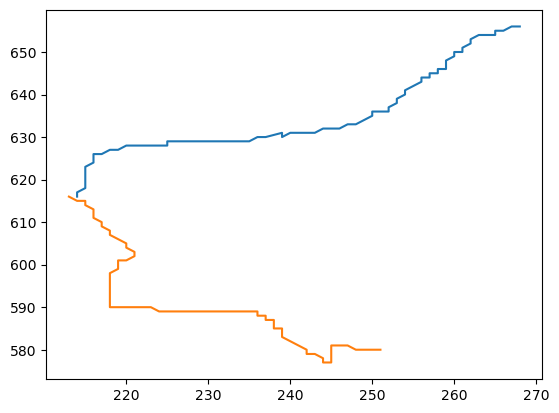

In [193]:
plt.plot(np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 16]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 16]['len_road']), 0], label='Дорога1')
plt.plot(np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 58]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 58]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 58]['len_road']), 0], label='Дорога1')

Диапазон

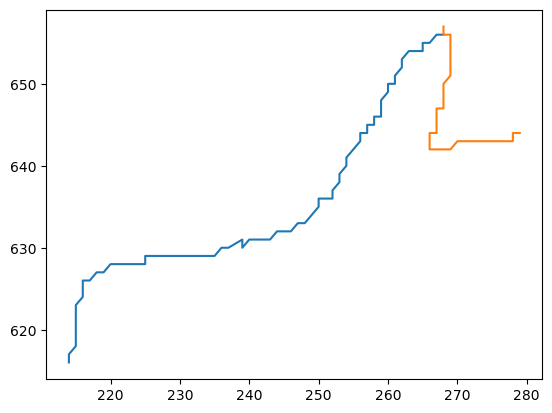

In [181]:
plt.plot(np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 16]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 16]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 16]['len_road']), 0], label='Дорога1')
plt.plot(np.array(ds[ds['id_road'] == 2]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 2]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 2]['len_road']), 1], \
              np.array(ds[ds['id_road'] == 2]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == 2]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == 2]['len_road']), 0], label='Дорога1')

In [182]:
ds[ds['id_road'] == 2]['neighbours']

1    [3, 16]
Name: neighbours, dtype: object

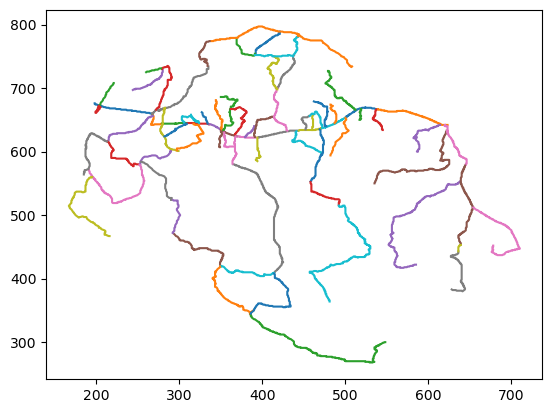

In [136]:
for i in ds['id_road']:
     plt.plot(np.array(ds[ds['id_road'] == i]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == i]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == i]['len_road']), 1], \
              np.array(ds[ds['id_road'] == i]['coordinate'].to_list()).reshape(\
     np.array(ds[ds['id_road'] == i]['coordinate'].to_list()).shape[1],\
          2)[0:int(ds[ds['id_road'] == i]['len_road']), 0], label='Дорога1')

In [137]:
ds['id_road'].values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 88, 95, 96, 98],
      dtype=int64)

In [139]:
k = ds[ds['id_road']==14]['id_road'].index.values[0]
ds[ds['id_road']!=14]['id_road'].values[k:]

array([15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 88, 95,
       96, 98], dtype=int64)

In [338]:
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]

asd

In [344]:
ds[ds['id_road']==1]['len_road'].values[0] < ds[ds['id_road']==14]['len_road'].values[0]

False

In [347]:
ds[ds['id_road']==1]['len_road'].values[0]

110

In [348]:
ds[ds['id_road']==14]['len_road'].values[0]

30

In [ ]:
a = np.in1d(ds[ds['id_road']==j]['i_coordinate'].values[0], ds[ds['id_road']==i]['i_coordinate'].values[0])

In [ ]:
ds[ds['id_road']==i]['len_road'].values[0] < ds[ds['id_road']==j]['len_road'].values[0]

In [349]:
a = np.intersect1d(ds[ds['id_road']==1]['i_coordinate'].values[0], ds[ds['id_road']==14]['i_coordinate'].values[0])
b = np.intersect1d(ds[ds['id_road']==1]['j_coordinate'].values[0], ds[ds['id_road']==14]['j_coordinate'].values[0])

In [367]:
np.in1d([str(item) for item in ds[ds['id_road']==1]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==32]['coordinate'].values[0]]).sum()

1

In [14]:
# по другому
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values[k:]:
        if(np.in1d([str(item) for item in ds[ds['id_road']==i]['coordinate'].values[0]], [str(item) for item in ds[ds['id_road']==j]['coordinate'].values[0]]).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)


In [15]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,x_last,y_last,xy_last,xy,coordinate,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,268,657,"(268, 657)","(198, 676)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,279,644,"(279, 644)","(268, 657)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,309,645,"(309, 645)","(280, 644)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,336,643,"(336, 643)","(310, 645)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 35]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,352,633,"(352, 633)","(336, 643)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20]"


In [ ]:
# по другому
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values[k:]:
        a = np.in1d(ds[ds['id_road']==i]['i_coordinate'].values[0], ds[ds['id_road']==j]['i_coordinate'].values[0])
        b = np.in1d(ds[ds['id_road']==i]['j_coordinate'].values[0], ds[ds['id_road']==j]['j_coordinate'].values[0])
        if(np.logical_and(a, b).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)


In [360]:
ds[ds['id_road']==1]['coordinate'].values[0]

[(676, 198),
 (675, 198),
 (675, 199),
 (674, 199),
 (674, 200),
 (674, 201),
 (673, 202),
 (673, 203),
 (672, 203),
 (672, 204),
 (672, 205),
 (672, 206),
 (671, 206),
 (671, 207),
 (671, 208),
 (670, 209),
 (670, 210),
 (670, 211),
 (669, 212),
 (669, 213),
 (669, 214),
 (669, 214),
 (669, 215),
 (668, 216),
 (668, 216),
 (668, 216),
 (668, 217),
 (668, 217),
 (668, 218),
 (668, 218),
 (668, 219),
 (668, 220),
 (668, 220),
 (668, 221),
 (668, 222),
 (668, 222),
 (668, 223),
 (667, 224),
 (667, 225),
 (667, 225),
 (667, 226),
 (667, 226),
 (667, 227),
 (667, 227),
 (667, 228),
 (667, 229),
 (666, 230),
 (666, 230),
 (666, 231),
 (666, 232),
 (666, 232),
 (666, 233),
 (666, 234),
 (666, 235),
 (666, 235),
 (666, 236),
 (665, 237),
 (665, 238),
 (665, 238),
 (665, 239),
 (665, 240),
 (665, 241),
 (665, 241),
 (665, 242),
 (665, 243),
 (664, 243),
 (664, 244),
 (664, 245),
 (664, 245),
 (664, 246),
 (664, 247),
 (664, 247),
 (664, 248),
 (663, 249),
 (663, 249),
 (663, 250),
 (663, 250),

In [350]:
a

array([673, 674, 676])

In [351]:
b

array([204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221])

In [345]:
# по другому
ds['neighbours'] = [[] for i in range(ds['id_road'].values.size)]
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values[k:]:
        if  ds[ds['id_road']==i]['len_road'].values[0] < ds[ds['id_road']==j]['len_road'].values[0]:
            a = np.in1d(ds[ds['id_road']==i]['i_coordinate'].values[0], ds[ds['id_road']==j]['i_coordinate'].values[0])
            b = np.in1d(ds[ds['id_road']==i]['j_coordinate'].values[0], ds[ds['id_road']==j]['j_coordinate'].values[0])
        else:
            a = np.in1d(ds[ds['id_road']==j]['i_coordinate'].values[0], ds[ds['id_road']==i]['i_coordinate'].values[0])
            b = np.in1d(ds[ds['id_road']==j]['j_coordinate'].values[0], ds[ds['id_road']==i]['j_coordinate'].values[0])
        if(np.logical_and(a, b).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)


In [346]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last,coordinate,neighbours,len_neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 14, 15, 32]",[109]
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16, 73]",[]
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73, 95, 96]",[]
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 34, 35, 96]",[]
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20, 36, 37]",[]


In [150]:
ds[ds['id_road']==2]['neighbours'].values[0]

[]

In [146]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last,coordinate,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)","[(676, 198), (675, 198), (675, 199), (674, 199...",[]
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)","[(657, 268), (656, 268), (656, 269), (655, 269...",[]
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)","[(644, 280), (644, 279), (644, 280), (644, 281...",[]
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)","[(645, 310), (645, 310), (645, 311), (645, 311...",[]
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)","[(643, 336), (643, 337), (643, 337), (643, 338...",[]


In [ ]:
ds[ds['id_road']==2]['neighbours'].values[0]

In [322]:
np.in1d(np.array([3, 6, 10, 12, 1, 0, 5, 201, 2]), np.array([1, 2]))

array([False, False, False, False,  True, False, False, False,  True])

In [336]:
np.in1d(np.array([1, -1, 2]), np.array([3, 6, 10, 12, 1, 0, 5, 201, 2])).sum()

2

In [335]:
np.in1d( np.array([3, 6, 10, 12, 1, 0, 5, 201, 2]), np.array([1, -1, 2])).sum()

2

In [330]:
np.array(ds[ds['id_road']==15]['i_coordinate'].values[0]).size, np.array(ds[ds['id_road']==1]['i_coordinate'].values[0]).size

(22, 110)

In [333]:
a = np.in1d(np.array(ds[ds['id_road']==15]['i_coordinate'].values[0]), np.array(ds[ds['id_road']==1]['i_coordinate'].values[0]))
b = np.in1d(np.array(ds[ds['id_road']==15]['j_coordinate'].values[0]), np.array(ds[ds['id_road']==1]['j_coordinate'].values[0]))
np.logical_and(a, b).sum()

22

In [ ]:
ds['len_road']

In [300]:
ds[ds['id_road']==2]['len_road'].values

array([44], dtype=int64)

In [301]:
ds[ds['id_road']==73]['len_road'].values

array([50], dtype=int64)

In [317]:
a = np.intersect1d(ds[ds['id_road']==1]['i_coordinate'].values[0], ds[ds['id_road']==15]['i_coordinate'].values[0])
b = np.intersect1d(ds[ds['id_road']==1]['j_coordinate'].values[0], ds[ds['id_road']==15]['j_coordinate'].values[0])
np.logical_and(a, b).sum()

ValueError: operands could not be broadcast together with shapes (12,) (7,) 

In [314]:
ds[ds['id_road']==1]['coordinate'].values

array([list([(676, 198), (675, 198), (675, 199), (674, 199), (674, 200), (674, 201), (673, 202), (673, 203), (672, 203), (672, 204), (672, 205), (672, 206), (671, 206), (671, 207), (671, 208), (670, 209), (670, 210), (670, 211), (669, 212), (669, 213), (669, 214), (669, 214), (669, 215), (668, 216), (668, 216), (668, 216), (668, 217), (668, 217), (668, 218), (668, 218), (668, 219), (668, 220), (668, 220), (668, 221), (668, 222), (668, 222), (668, 223), (667, 224), (667, 225), (667, 225), (667, 226), (667, 226), (667, 227), (667, 227), (667, 228), (667, 229), (666, 230), (666, 230), (666, 231), (666, 232), (666, 232), (666, 233), (666, 234), (666, 235), (666, 235), (666, 236), (665, 237), (665, 238), (665, 238), (665, 239), (665, 240), (665, 241), (665, 241), (665, 242), (665, 243), (664, 243), (664, 244), (664, 245), (664, 245), (664, 246), (664, 247), (664, 247), (664, 248), (663, 249), (663, 249), (663, 250), (663, 250), (663, 251), (663, 251), (663, 252), (663, 253), (663, 253), (66

In [315]:
ds[ds['id_road']==15]['coordinate'].values

array([list([(672, 203), (671, 203), (670, 202), (669, 202), (668, 202), (666, 201), (665, 201), (664, 200), (663, 199), (662, 199), (661, 199), (661, 200), (662, 200), (663, 201), (664, 202), (665, 202), (666, 203), (667, 204), (669, 204), (669, 204), (670, 205), (670, 205)])],
      dtype=object)

In [305]:
A = np.array([1, 512, 2, 0, -1])
A.sort()

In [306]:
A

array([ -1,   0,   1,   2, 512])

In [303]:
ds[ds['id_road']==2]['coordinate'].values

array([list([(657, 268), (656, 268), (656, 269), (655, 269), (655, 269), (654, 269), (653, 269), (653, 269), (652, 269), (652, 269), (651, 269), (651, 269), (650, 268), (649, 268), (649, 268), (648, 268), (648, 268), (647, 268), (647, 267), (646, 267), (645, 267), (644, 267), (644, 266), (643, 266), (643, 266), (642, 266), (642, 267), (642, 268), (642, 269), (643, 270), (643, 271), (643, 272), (643, 273), (643, 273), (643, 274), (643, 274), (643, 275), (643, 275), (643, 276), (643, 277), (643, 277), (643, 278), (644, 278), (644, 279)])],
      dtype=object)

In [296]:
a

array([642, 643, 644])

In [309]:
np.sort(ds[ds['id_road']==2]['i_coordinate'].values[0])

array([642, 642, 642, 642, 643, 643, 643, 643, 643, 643, 643, 643, 643,
       643, 643, 643, 643, 643, 643, 644, 644, 644, 644, 645, 646, 647,
       647, 648, 648, 649, 649, 650, 651, 651, 652, 652, 653, 653, 654,
       655, 655, 656, 656, 657])

In [310]:
a = np.in1d(np.sort(ds[ds['id_road']==73]['i_coordinate'].values[0]), np.sort(ds[ds['id_road']==2]['i_coordinate'].values[0]))
b = np.in1d(np.sort(ds[ds['id_road']==73]['j_coordinate'].values[0]), np.sort(ds[ds['id_road']==2]['j_coordinate'].values[0]))
np.logical_and(a, b).sum()

0

In [308]:
a = np.in1d(np.sort(ds[ds['id_road']==2]['i_coordinate'].values[0]), np.sort(ds[ds['id_road']==73]['i_coordinate'].values[0]))
b = np.in1d(np.sort(ds[ds['id_road']==2]['j_coordinate'].values[0]), np.sort(ds[ds['id_road']==73]['j_coordinate'].values[0]))
np.logical_and(a, b).sum()

0

In [294]:
b

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True])

In [286]:
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values[k:]:
        a = np.in1d(np.sort(ds[ds['id_road']==j]['i_coordinate'].values[0]), np.sort(ds[ds['id_road']==i]['i_coordinate'].values[0]))
        b = np.in1d(np.sort(ds[ds['id_road']==j]['j_coordinate'].values[0]), np.sort(ds[ds['id_road']==i]['j_coordinate'].values[0]))
        if(np.logical_and(a, b).sum() > 0):
            ds[ds['id_road']==j]['neighbours'].values[0].append(i)


In [287]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last,coordinate,neighbours,len_neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 15, 32]","[109, 8, 236]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16, 73]","[44, 1]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73, 95, 96]",[]
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 34, 35, 96]",[]
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20, 36, 37]",[]


In [132]:
sosedi = []
for j in ds['id_road'].values:
    k = ds[ds['id_road']==j]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=j]['id_road'].values[k:]:
        a = np.in1d(ds[ds['id_road']==j]['i_coordinate'].values[0], ds[ds['id_road']==i]['i_coordinate'].values[0])
        b = np.in1d(ds[ds['id_road']==j]['j_coordinate'].values[0], ds[ds['id_road']==i]['j_coordinate'].values[0])
        np.logical_and(a, b).sum()
        if(np.logical_and(a, b).sum() > 0):
            print(str(j) + ' Соседи ' + str(i))

1 Соседи 2
1 Соседи 15
1 Соседи 32
2 Соседи 3
2 Соседи 16
2 Соседи 73
3 Соседи 33
3 Соседи 34
3 Соседи 73
3 Соседи 95
3 Соседи 96
4 Соседи 5
4 Соседи 34
4 Соседи 35
4 Соседи 96
5 Соседи 6
5 Соседи 20
5 Соседи 36
5 Соседи 37
6 Соседи 20
6 Соседи 21
6 Соседи 38
6 Соседи 82
7 Соседи 23
8 Соседи 23
8 Соседи 40
9 Соседи 25
9 Соседи 43
10 Соседи 26
10 Соседи 45
10 Соседи 46
12 Соседи 28
12 Соседи 31
16 Соседи 58
20 Соседи 37
21 Соседи 82
22 Соседи 64
24 Соседи 25
29 Соседи 30
30 Соседи 31
32 Соседи 33
32 Соседи 48
33 Соседи 48
33 Соседи 73
36 Соседи 37
37 Соседи 38
39 Соседи 40
40 Соседи 41
43 Соседи 44
44 Соседи 45
45 Соседи 47
46 Соседи 47
49 Соседи 78
51 Соседи 52
51 Соседи 53
52 Соседи 53
52 Соседи 74
53 Соседи 74
54 Соседи 76
55 Соседи 76
56 Соседи 76
57 Соседи 74
57 Соседи 76
58 Соседи 61
58 Соседи 62
59 Соседи 73
61 Соседи 62
61 Соседи 63
61 Соседи 83
64 Соседи 66
66 Соседи 67
69 Соседи 70
70 Соседи 71
72 Соседи 84
73 Соседи 95
95 Соседи 96


In [157]:
ds[ds['id_road'] == 2]['coordinate'].values[0]
ds[ds['id_road'] == 3]['coordinate'].values[0]

[(644, 280),
 (644, 279),
 (644, 280),
 (644, 281),
 (644, 282),
 (644, 283),
 (644, 284),
 (644, 285),
 (644, 286),
 (644, 287),
 (644, 288),
 (644, 289),
 (644, 290),
 (644, 291),
 (644, 292),
 (644, 293),
 (644, 293),
 (644, 294),
 (644, 295),
 (644, 296),
 (644, 295),
 (644, 297),
 (644, 298),
 (645, 299),
 (645, 300),
 (645, 301),
 (645, 302),
 (645, 303),
 (645, 303),
 (645, 304),
 (645, 305),
 (645, 306),
 (645, 307),
 (645, 308),
 (645, 309)]

In [158]:
ds[ds['id_road'] == 2]['j_coordinate'].values[0]
ds[ds['id_road'] == 2]['i_coordinate'].values[0]
ds[ds['id_road'] == 3]['j_coordinate'].values[0]
ds[ds['id_road'] == 3]['i_coordinate'].values[0]

[644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 644,
 645,
 645,
 645,
 645,
 645,
 645,
 645,
 645,
 645,
 645,
 645,
 645]

In [154]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,x,y,xy,x_last,y_last,xy_last,coordinate,neighbours
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,198,676,"(198, 676)",268,657,"(268, 657)","[(676, 198), (675, 198), (675, 199), (674, 199...","[2, 15, 32]"
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,268,657,"(268, 657)",279,644,"(279, 644)","[(657, 268), (656, 268), (656, 269), (655, 269...","[3, 16, 73]"
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,280,644,"(280, 644)",309,645,"(309, 645)","[(644, 280), (644, 279), (644, 280), (644, 281...","[33, 34, 73, 95, 96]"
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,310,645,"(310, 645)",336,643,"(336, 643)","[(645, 310), (645, 310), (645, 311), (645, 311...","[5, 34, 35, 96]"
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,336,643,"(336, 643)",352,633,"(352, 633)","[(643, 336), (643, 337), (643, 337), (643, 338...","[6, 20, 36, 37]"


In [57]:
ds[ds['id_road']==2]['xy'].to_list()

[(268, 657)]

In [86]:
for j in ds[ds['id_road']]['id_road'].values:
    k = ds[ds['id_road']==1]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=1]['id_road'].values[k:]:
        if(ds[ds['id_road']==i]['xy_last'].values[0] == ds[ds['id_road']==j]['xy_last'].values[0]):
            print(2+2)
np.intersect1d(np.array([(36, 11), (32, 11), (36, 11), (36, 12), (36, 11)]), 
               np.array([(37, 15), (36, 12)]))

True

In [89]:
np.array([]).size

0

In [28]:
ds[ds['id_road']==2]['xy'].to_list() == ds[ds['id_road']==1]['xy'].to_list()

False

In [38]:
if(ds[ds['id_road']==1]['xy'].to_list() == ds[ds['id_road']==2]['xy'].to_list()):
    print('+')

In [42]:
ds[ds['id_road']!=76]['id_road'].values[76-1:]

array([82, 83, 84, 88, 95, 96, 98], dtype=int64)

In [49]:
ds['xy_last'].value_counts().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
ds[ds['id_road']==1]['xy'], ds[ds['id_road']==1]['xy_last']

(0    (198, 676)
 Name: xy, dtype: object,
 0    (268, 657)
 Name: xy_last, dtype: object)

In [54]:
ds[ds['id_road']==16]['xy_last'], ds[ds['id_road']==16]['xy']

(14    (214, 616)
 Name: xy_last, dtype: object,
 14    (268, 656)
 Name: xy, dtype: object)

In [52]:
ds[ds['id_road']==14]['xy_last'], ds[ds['id_road']==14]['xy']

(12    (204, 673)
 Name: xy_last, dtype: object,
 12    (221, 708)
 Name: xy, dtype: object)

In [46]:
ds['xy'].value_counts()

(280, 644)    3
(213, 616)    2
(198, 676)    1
(369, 779)    1
(414, 408)    1
             ..
(620, 642)    1
(622, 633)    1
(614, 642)    1
(537, 666)    1
(278, 731)    1
Name: xy, Length: 80, dtype: int64

In [48]:
for j in ds['id_road'].values:
    for i in ds[ds['id_road']!=j]['id_road'].values[j-1:]:
        if(ds[ds['id_road']==i]['xy_last'].to_list() == ds[ds['id_road']==j]['xy'].to_list()):
            print(i)

84


In [61]:
ds[ds['id_road']==2]['xy_last'].values[0]

(279, 644)

In [67]:
ds[ds['id_road']!=5]['id_road'].values[5-1:]

array([ 6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 80, 81, 82, 83, 84, 88, 95, 96, 98], dtype=int64)

In [74]:
ds[ds['id_road']==95]['id_road'].index.values[0]

80

In [78]:
k = ds[ds['id_road']==1]['id_road'].index.values[0]
ds[ds['id_road']!=1]['id_road'].values[k:]

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 88, 95, 96, 98],
      dtype=int64)

In [40]:
for j in ds[ds['id_road']]['id_road'].values:
    k = ds[ds['id_road']==1]['id_road'].index.values[0]
    for i in ds[ds['id_road']!=1]['id_road'].values[k:]:
        if(ds[ds['id_road']==i]['xy_last'].values[0] == ds[ds['id_road']==j]['xy_last'].values[0]):
            print(2+2)

KeyError: "None of [Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 20, 21,\n            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,\n            39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,\n            56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,\n            73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 88, 95, 96, 98],\n           dtype='int64')] are in the [columns]"

In [ ]:
G.add_weighted_edges_from([
    ('s', 'u', 10), ('s', 'x', 5), ('u', 'v', 1), ('u', 'x', 2), 
    ('v', 'y', 1), ('x', 'u', 3), ('x', 'v', 5), ('x', 'y', 2), 
    ('y', 's', 7), ('y', 'v', 6)])

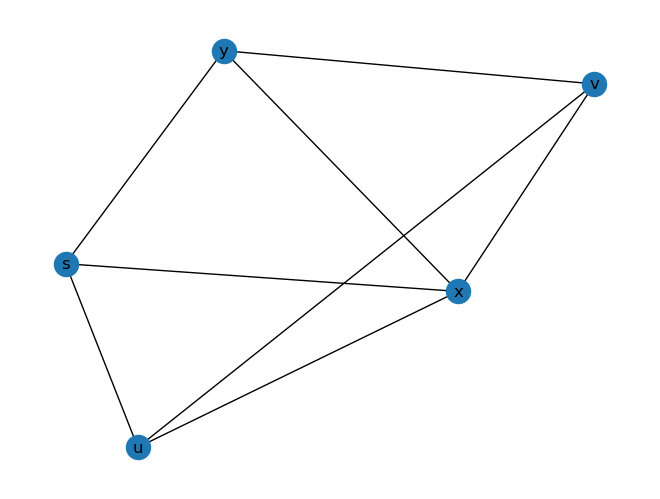

In [8]:
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (5, 3), (3, 4), (6, 5)]
G = nx.Graph()
G.add_weighted_edges_from([
    ('s', 'u', 10), ('s', 'x', 5), ('u', 'v', 1), ('u', 'x', 2), 
    ('v', 'y', 1), ('x', 'u', 3), ('x', 'v', 5), ('x', 'y', 2), 
    ('y', 's', 7), ('y', 'v', 6)])
nx.draw(G, with_labels=True)